In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def rk4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

In [3]:
def MyModel_Rho_a52_s5C(X, t, rho_5C, a52, g, gT, d, s15, s5C):
    
    x1, x5 = X
    
    dotx1 = x1 - g*x1*x1 - gT*x1 - s15*x5*x1
    
    dotx5 = d - d*x5 + rho_5C*((x1)/(a52+x1))*x5 -s5C*x1*x5 
    
    return np.array([dotx1, dotx5])

In [4]:
aC = 0.2

rho_5C = 0

a52 = 0.0000225

g = 1/6

gT = 0.3

d = 0.23

s15 = 0.5

s5C = 0

In [5]:
Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[10**(-9),1]
rk4_MyModel = rk4(MyModel_Rho_a52_s5C, x0, t, args = (rho_5C, a52, g, gT, d, s15, s5C))
t, Xs = rk4_MyModel
x1_flat, x5_flat = Xs.T

x0=[0.25,0.25]
rk4_MyModel = rk4(MyModel_Rho_a52_s5C, x0, t, args = (rho_5C, a52, g, gT, d, s15, s5C))
t, Xs = rk4_MyModel
x1_lower, x5_lower = Xs.T

x0=[0.25,1.75]
rk4_MyModel = rk4(MyModel_Rho_a52_s5C, x0, t, args = (rho_5C, a52, g, gT, d, s15, s5C))
t, Xs = rk4_MyModel
x1_upper, x5_upper = Xs.T

Text(0.01, 1.05, '$e_0$')

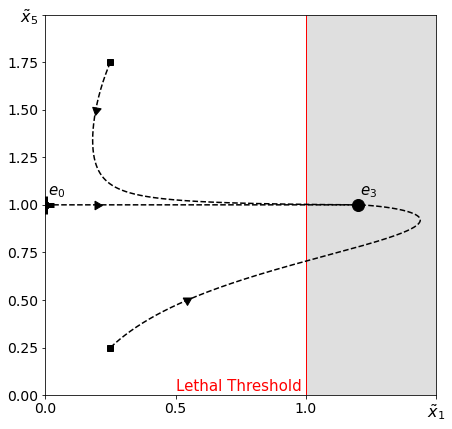

In [6]:
fig, axs = plt.subplots(1,1,figsize=(7,7))

axs.set_xlim(0,1.5)
axs.set_ylim(0,2)

axs.plot(0,1,'k+',mew=5,markersize=18)
axs.plot(1.2,1,'ko',markersize=12)

axs.plot(x1_flat, x5_flat, 'k--', linewidth=1.5)
axs.plot(x1_upper, x5_upper, 'k--',linewidth=1.5)
axs.plot(x1_lower, x5_lower, 'k--',linewidth=1.5)


axs.plot(0.25,1.75,'ks',markersize=6)
axs.plot(0.25,0.25,'ks',markersize=6)
axs.plot(10**(-9),1,'ks',markersize=6)

axs.set_xticks([0,0.5,1,1.5])
axs.set_xticklabels(['0.0','0.5','1.0',r'$\tilde{x}_1$'],fontsize=14)

axs.set_yticks([0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00])
axs.set_yticklabels(['0.00','0.25','0.50','0.75','1.00','1.25','1.50','1.75',r'$\tilde{x}_5$'],fontsize=14)

axs.get_xticklabels()[-1].set_fontsize(16)
axs.get_yticklabels()[-1].set_fontsize(16)

axs.vlines(1.0,0,2,'r',linewidth=1)

axs.fill_between(np.array([0.0,1.0,1.0,1.5]),np.array([2.0,2.0,0.0,0.0]),2*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)

axs.text(0.5,0.02,'Lethal Threshold',c='r',fontsize=15)

axs.plot(x1_upper[176], x5_upper[176], marker=(3,0,170), markersize=10,color='k')
axs.plot(x1_lower[176], x5_lower[176], marker=(3,0,-60), markersize=10,color='k')
axs.plot(0.2, 1, marker=(3,0,-90), markersize=10,color='k')

axs.text(1.21,1.05,r'$e_3$',fontsize=15)
axs.text(0.01,1.05,r'$e_0$',fontsize=15)